# Тема “Обучение без учителя”

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
%config InlineBackend.figure_format = 'svg'

In [4]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [5]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
y = pd.DataFrame(boston.target, columns=["price"])

In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:

n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [10]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

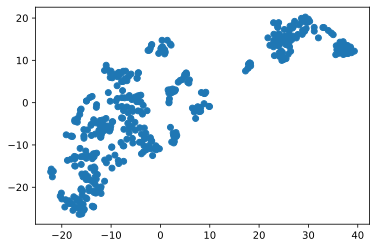

In [11]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.<br>
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

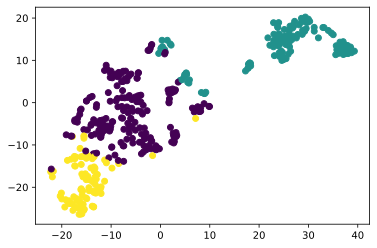

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

- средние значения price в разных кластерах:

In [13]:
y_train[labels_train == 0].mean()

price    24.958115
dtype: float64

In [14]:
y_train[labels_train == 1].mean()

price    16.165354
dtype: float64

In [15]:
y_train[labels_train == 2].mean()

price    27.788372
dtype: float64

- средние значения CRIM в разных кластерах:

In [16]:
X_train['CRIM'][labels_train == 0].mean()

0.42166020942408367

In [17]:
X_train['CRIM'][labels_train == 1].mean()

10.797028425196853

In [18]:
X_train['CRIM'][labels_train == 2].mean()

0.07356558139534886

### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [19]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

In [20]:
labels_test = kmeans.fit_predict(X_test_scaled)

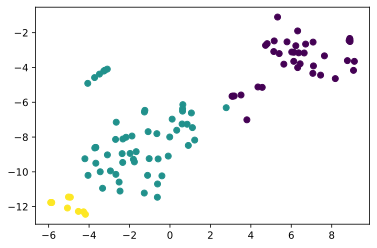

In [21]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.show()

- средние значения price в разных кластерах: (на тестовых данных)

In [22]:
y_test[labels_test == 0].mean()

price    16.710526
dtype: float64

In [23]:
y_test[labels_test == 1].mean()

price    22.690909
dtype: float64

In [24]:
y_test[labels_test == 2].mean()

price    34.311111
dtype: float64

- средние значения CRIM в разных кластерах: (на тестовых данных)

In [25]:
X_test['CRIM'][labels_test == 0].mean()

9.419181842105264

In [26]:
X_test['CRIM'][labels_test == 1].mean()

0.21929690909090907

In [27]:
X_test['CRIM'][labels_test == 2].mean()

0.04070333333333334